In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Case Study 1 : Finding the winning strategy in a card game 


### Problem statement
Bạn có muốn kiếm được 1 ít tiền không ? Hãy đặt cược và 1 trò chơi bài với số tiền cực nhỏ.Trước mặt bạn là một bộ bài bị xáo trộn. Tất cả 52 lá nằm úp xuống. Một nửa số thẻ có màu đỏ, và một nửa là màu đen. Tôi sẽ tiến hành lật từng thẻ một. Nếu lá bài cuối cùng tôi lật có màu đỏ, bạn sẽ thắng một đô la. Nếu không, bạn sẽ mất một đô la.

Đây là bước ngoặt: bạn có thể yêu cầu tôi tạm dừng trò chơi bất cứ lúc nào. Khi bạn nói “Tạm dừng”, tôi sẽ lật lá bài tiếp theo và kết thúc trò chơi. Thẻ tiếp theo sẽ đóng vai trò là thẻ cuối cùng. Bạn sẽ giành được một đô la nếu nó có màu đỏ,

#### Overview 
1. Tính xác xuất và quan sát sự kiện 
2. Vẽ đồ thị xác xuất của sự kiện trên 1 khoảng thời gian 
3. Simulate random processes, such as coin flips and card shuffling, using Python.

# Computing probabilities using Python 
Trong chương này chúng ta sẽ học được 
1. Những cái gì là cơ bản về lý thuyết xác xuất
2. Tính xuất xuất của 1 quan sát
3. Tính toán xác xuất theo phạm vị quan sát 

## 1.1 Sample space analysis
Một hành động có thể đo lường. Một *không gian mẫu* là tập hợp của tất cả các trường hợp có thể xẩy ra của hành động đó . Chúng ta cùng lấy 1 hành động đơi giản của đồng xu. Chỉ đơn giảng là Mặt ngửa hay mặt ups. và chúng ta lưu trữ cái không gian mẫu

In [2]:
sample_space = {'Head','Tails'}

Tính toán xác xuất khi tung mặt ngửa


In [3]:
probability_heads = 1/len(sample_space)
print(f"Probability of choosing head is {probability_heads}")

Probability of choosing head is 0.5


**Sự kiện** là 1 tập con của các phần tử trong không gian mẫu phù hợp với 1 vài sự kiện có điều kiên. Một sự kiện điều kiện là đơn giản là Boolean function cái nơi đầu vào là 1 các phần tử là không gian mẫu. Hàm đó trả về `True` khi và chỉ khi element phù hợp với điều kiện của chúng ta

Chúng ta cùng định nghĩa các sự kiện có điều kiệu 

In [4]:
def is_head_or_tails(outcome):
    return outcome in {'Head','Tails'}
def is_neither(outcome):
    return not is_head_or_tails(outcome)
def is_heads(outcome):
    return outcome == 'Head'
def is_tails(outcome):
    return outcome == 'Tails'

Chúng ta có thể truyền `event condition` vào trong 1 hàm có tên là `get_matching_even` function rằng function định nghĩa ở dưới đây


In [5]:
def get_matching_event(event_condition,sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

In [6]:
event_conditions = [is_head_or_tails,is_heads,is_tails,is_neither]
for event_condition in event_conditions:
    print(f"Event condition : {event_condition.__name__}")
    event = get_matching_event(event_condition,sample_space)
    print(f"Event: {event}")


Event condition : is_head_or_tails
Event: {'Tails', 'Head'}
Event condition : is_heads
Event: {'Head'}
Event condition : is_tails
Event: {'Tails'}
Event condition : is_neither
Event: set()


In [7]:
def compute_probability(event_condition,generic_sample_space):
    event = get_matching_event(event_condition,generic_sample_space)
    return len(event)/len(generic_sample_space)
    

In [8]:
for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


### 1.1.1 Analyzing a biased coin
Chúng ta đã tính toán xác xuất của 1 unbiased coin. Cái gì xảy ra nếu coin có thêm biased. Giả sử rằng, coin mặt ngửa khả năng rơi vào mặt ngửa là gấp 4 lần thằng mặt sấp. Làm ntn để chúng ta tính đoán cái `outcome`

In [9]:
weighted_sample_space = {'Heads':4,'Tails':1}

Chúng ta đã có 1 không gian mẫu mới và được lưu trữ trong 1 dic. Đây sẽ cho phép chúng ta định nghĩa lại cái size của không gian mẫu là `sum weight`.

In [10]:
sample_space_size = sum(weighted_sample_space.values())
print(sample_space_size)

5


In [11]:
assert sample_space_size == 5

Chúng ta đã định nghĩa lại cái kích thước của sự kiện. Mỗi sự kiệu là tập của outcomes và cái đó phải map với weiths. 

In [12]:
event = get_matching_event(is_head_or_tails,weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert  event_size == 5

AssertionError: 

In [13]:
def compute_event_probability(event_condition,generic_sample_space):
    event = get_matching_event(event_condition,generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event)/len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size/sum(generic_sample_space.values())

In [14]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_head_or_tails' is 0.2
Probability of event arising from 'is_heads' is 0.0
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.8


##  Computing nontrivial probabilities 
Chúng ta sẽ giải quyết một số vấn đề ví dụ bằng cách sử dụng *compute_event_probability*

### 1.2.1 Problem 1: Phân tính 1 gia đình với 4 người con 
Giả sử 1 gia đình có 4 người con. Xác xuất 2 người con là nam ?. Chúng ta sẽ giả sử rằng mỗi con đc sinh ra là nam hoặc nữ. Vì vậy chúng ta có thể xây dựng 1 không gian mẫu không có trọng lượng cái nơi mà mỗi outcome đại diện cho 1 sequences có thể xảy ra của 4 người con được show ở dưới 

BBBB
BBBG 
BBGB
BGBB
GBBB
GGBB
GBBG
GBBG
BBGG
BGBG
GBGB
BGGB
BGGG
GGGB
GBGG
GGBG
GGGG

In [15]:
possible_children= ['Boy','Girl']
sample_space = set()
for child_1 in possible_children:
    for child_2 in possible_children:
        for child_3 in possible_children:
            for child_4 in possible_children:
                outcome = (child_1,child_2,child_3,child_4)
                sample_space.add(outcome)
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

Chúng ta đã chạy 4 for nested lốp và khám phá ra 1 trật tự của 4 trường hợp. Nhưng ở trên kp là code tối ưu nhất để sử dụng. Chúng ta có thể dễ dàng tạo ra không gian mẫu sử dụng *Python*`itertools.product` function nó sẽ trả về cặt combinartions của tất cả các phần tử trong tất cả input list.

In [16]:
from itertools import  product
all_combinations = product(*(4*[possible_children]))
set(all_combinations)

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

Chúng ta có thể sử dụng tốt hơn bởi sử dụng code
```
set(product(possible_children,repeat=4))
```

In [17]:
sample_space_efficient = set(product(possible_children, repeat=4))

Tính xác suất của trường hợp 2 boys


In [18]:
def has_two_boys(outcome):
    return len([child for child in outcome if child == 'Boy']) == 2

In [19]:
prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")
#Probability of 2 boys is 0.37

Probability of 2 boys is 0.375


### 1.2.2: Problem 2: Phân tích nhiều con xúc xắc

Giả sử chúng ta 1 cái xúc xắc và các mặt đánh số từ 1 tới 6. và tung nó lên 6 lần. vậy xác xuất mỗi lầ là là 21 ? 

In [20]:
possible_rolls = list(range(1,7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


Tiếp đến chúng ta tạo 1 không gian mẫu cho 6 lần tung xúc xắc sử dụng `product function`

In [21]:
sample_space = set(product(possible_rolls,repeat=6))
sample_space

{(3, 1, 4, 6, 4, 3),
 (6, 1, 3, 6, 3, 3),
 (2, 4, 2, 6, 4, 3),
 (2, 6, 4, 6, 3, 6),
 (3, 1, 1, 2, 2, 3),
 (2, 2, 5, 5, 5, 5),
 (1, 3, 6, 3, 6, 5),
 (6, 2, 3, 3, 2, 6),
 (6, 1, 4, 1, 2, 5),
 (2, 5, 2, 3, 3, 6),
 (6, 2, 3, 2, 3, 2),
 (2, 3, 3, 6, 3, 1),
 (1, 3, 6, 1, 3, 6),
 (1, 6, 1, 6, 4, 4),
 (4, 4, 4, 5, 5, 1),
 (3, 4, 2, 1, 6, 6),
 (3, 1, 6, 5, 2, 6),
 (3, 1, 6, 4, 3, 2),
 (3, 5, 3, 3, 2, 3),
 (3, 6, 5, 3, 3, 4),
 (6, 4, 4, 5, 5, 2),
 (4, 5, 6, 1, 6, 4),
 (5, 1, 3, 6, 4, 2),
 (3, 6, 3, 5, 5, 6),
 (3, 4, 2, 6, 6, 1),
 (6, 3, 5, 3, 1, 1),
 (1, 2, 6, 2, 2, 2),
 (1, 4, 2, 6, 5, 3),
 (6, 5, 4, 1, 5, 1),
 (2, 3, 5, 1, 3, 3),
 (1, 1, 1, 1, 6, 3),
 (1, 2, 2, 4, 1, 4),
 (3, 6, 4, 5, 6, 6),
 (6, 5, 3, 1, 5, 3),
 (4, 2, 5, 2, 1, 2),
 (1, 5, 3, 2, 6, 5),
 (2, 4, 1, 5, 3, 6),
 (2, 1, 2, 3, 5, 5),
 (3, 2, 4, 4, 5, 4),
 (2, 6, 1, 1, 6, 3),
 (5, 4, 5, 5, 6, 2),
 (2, 3, 4, 3, 6, 5),
 (6, 6, 6, 2, 2, 3),
 (3, 5, 4, 5, 1, 1),
 (4, 2, 4, 4, 4, 4),
 (4, 4, 5, 2, 3, 6),
 (5, 6, 5, 1, 3, 6),
 (5, 1, 2, 5,

In [22]:
def has_sum_of_21(outcome):return sum(outcome) == 21

In [23]:
prob = compute_event_probability(has_sum_of_21,sample_space)
prob

0.09284979423868313

### 1.2.3 Problem 3: Tính xác xuất của súc sắc có weighted trong không gian mẫu 

Chúng ta vừa tính xác xuất 6 lần tung xăc có thể tổng là 21. Bây giờ chúng ta sẽ tính lại xác xuất khi có weight trong sample sace. Chúng ta cần  chuyển đổi không gian mẫu không có weighted sang không gian mẫu có weithg. 

In [24]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] +=1

In [25]:
weighted_sample_space

defaultdict(int,
            {21: 4332,
             22: 4221,
             27: 1666,
             12: 456,
             24: 3431,
             19: 3906,
             18: 3431,
             20: 4221,
             23: 3906,
             26: 2247,
             28: 1161,
             15: 1666,
             17: 2856,
             13: 756,
             14: 1161,
             30: 456,
             16: 2247,
             25: 2856,
             9: 56,
             32: 126,
             31: 252,
             29: 756,
             11: 252,
             33: 56,
             10: 126,
             7: 6,
             35: 6,
             8: 21,
             34: 21,
             6: 1,
             36: 1})

In [26]:
num_combinations = weighted_sample_space[21]

In [27]:
num_combinations

4332

In [28]:
event = get_matching_event(lambda x : sum(x) == 21, sample_space)
len(event)

4332

In [29]:
prob = compute_event_probability(lambda x: x == 21,
weighted_sample_space)
prob

0.09284979423868313

## 1.3 Tính xác xuất trên phạm vi khoảng thời gian 
Cho đến nay, chúng tôi chỉ phân tích các điều kiện sự kiện thỏa mãn một số giá trị đơn lẻ. Bây giờ, chúng tôi sẽ phân tích các điều kiện sự kiện kéo dài các khoảng giá trị. Một khoảng thời gian alf 1 tập hợp các só giữa bao gồm 2 ranh giới của chúng. 


In [30]:
def is_in_interval(number,minimum,maximum):
    return minimum <= number <= maximum

Cho bạn một `is_in_interval()`, chúng ta có thể tính xác xuất rằng của 1 sự kiện liên quan tới giá trị trong 1 khoảng số nhất định. Ví dụ, chúng ta sẽ tính  khả năng xả ra của 6 con xúc xắc đó khoảng 10->21 

In [31]:
prob = compute_event_probability(lambda x  : is_in_interval(x,10,21),weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


### 1.3.1 : Đánh giá các cực trị bằng cách sử dụng phân tích khoảng thời gian

Phân tích khoảng thời gian là rất quan trọng để giải quyết toàn bộ các vấn đề rất quan trọng trong xác suất và thống kê. Một trong những vấn đề như vậy liên quan đến việc đánh giá các điểm cực đoan: vấn đề nằm ở việc liệu dữ liệu quan sát có quá cực đoan để có thể tin được hay không ? 
Dữ liệu có vẻ cực đoan khi nó xảy ra một cách ngẫu nhiên quá bất thường. Ví dụ: giả sử chúng ta quan sát 10 lần lật của một đồng xu được cho là công bằng và đồng xu đó rơi vào mặt ngửa 8 trong số 10 lần. Đây có phải là một kết quả hợp lý cho một đồng tiền công bằng? Hay đồng xu của chúng ta bí mật thiên về hạ cánh? Để tìm hiểu, chúng ta phải trả lời câu hỏi sau: xác suất để 10 lần tung đồng xu công bằng dẫn đến số đầu cực đoan là bao nhiêu? Chúng tôi sẽ xác định số lượng đầu cực đại là tám đầu trở lên.

In [32]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Head','Tails'], repeat=num_flips):
        head_count = len([outcome for outcome in coin_flips if outcome == 'Head'])
        weighted_sample_space[head_count] +=1
    return weighted_sample_space

In [33]:
weighted_sample_space = generate_coin_sample_space()
weighted_sample_space[10]

1

In [34]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10),
weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


# Section 2- Plotting probabilities using Matplotlib
 

Trong section này chúgn ta cover 
1. Tạo 1 plot đơn giản sử dụng Matplotlib
2. Label plotted data
3. Phân phối xác xuất
4. Ploting và comparing multiple probability distributions 

## 2.1 Basic Matplot lib plots 


Plot a linear relationship

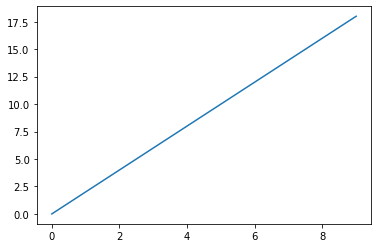

In [35]:
x= range(0,10)
y= [2*value for value in x]
plt.plot(x,y)
plt.show();


Plotting individual data points


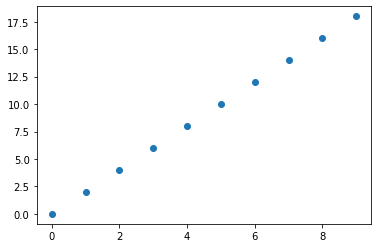

In [36]:
plt.scatter(x,y)
plt.show()

Giả sử chúng ta muốn nhấn mạnh khoảng thời gian mà **x** bắt đầu từ 2 và kết thúc từ 6. Chúng ta có thể làm điều đó bằng việc tô đường cong được vẽ trong khoảng thời gian chỉ định sử dụng. `plt.fill_between()`. Cái hàm này lấu inpuy đầu vào là cả x và y cũng như là where parameter như là 1 lis boolean values và True nếu x value. 

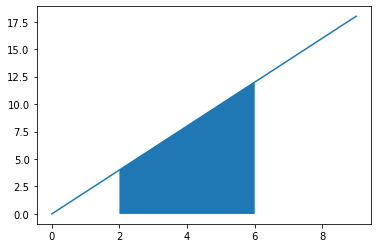

In [37]:
plt.plot(x,y)
where = [is_in_interval(value,2,6) for value in x]
plt.fill_between(x,y,where=where)
plt.show()

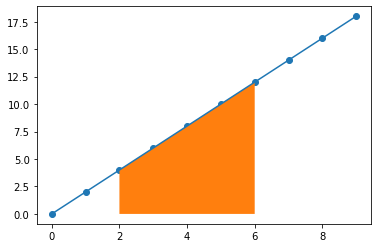

In [38]:
plt.scatter(x,y)
plt.plot(x,y)
where = [is_in_interval(value,2,6) for value in x]
plt.fill_between(x,y,where=where)
plt.show()

### 2.2 Plotting coin-flip probabilities 


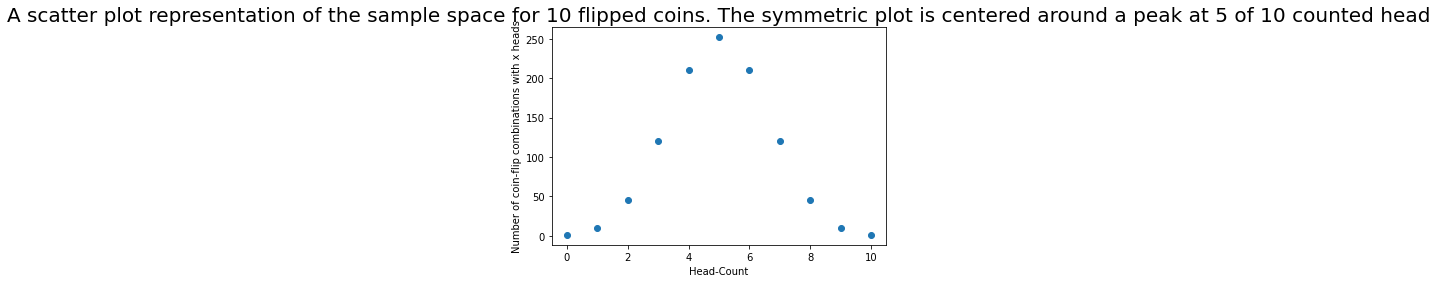

In [45]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips,y_10_flips)
plt.xlabel('Head-Count')
plt.title('A scatter plot representation of the sample space for 10 flipped coins. The symmetric plot is centered around a peak at 5 of 10 counted head',fontsize=20)

plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

Giờ chúng ta  tính xác xuất của số lần tung được 1,2,3,4 mặt ngửa trong 10 lần thử 

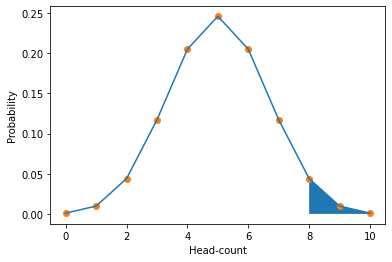

In [51]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips =  [value / sample_space_size for value in y_10_flips]
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips,prob_x_10_flips,where=where)
plt.scatter(x_10_flips,prob_x_10_flips)
plt.plot(x_10_flips,prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

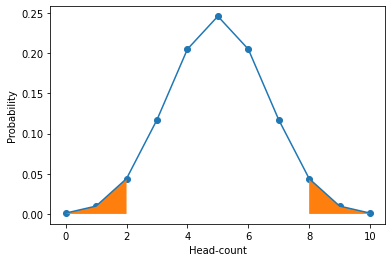

In [52]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

### 2.2.1 Comparing mutiple coin flips probabilities distributions 
 